In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 2
from lbxs4.simulations import LBSky
from lbxs4.simulations import S4Sky
import lbxs4.utils as utils
from lbxs4.config import DATDIR
from lbxs4.filtering import FiltCoadd

In [3]:
dire = '/pscratch/sd/l/lonappan/LBxS4'

In [4]:
lblib = LBSky(dire,512)
s4lib = S4Sky(1024)

# LiteBIRD only E-mode filtering

In [5]:
fc_lb = FiltCoadd(dire,lblib=lblib)

INFO:LiteBIRD simulation library is loaded


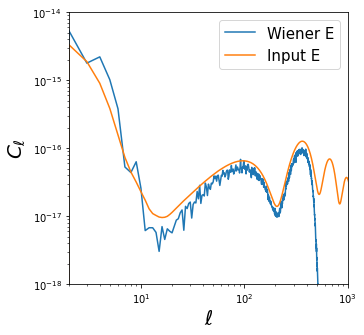

In [6]:
#fc_lb.filtEmode(0)
fc_lb.plot_W_E(0)

# CMB-S4 only E-mode filtering

In [7]:
fc_s4 = FiltCoadd(dire,s4lib=s4lib)

INFO:CMB-S4 simulation library is loaded


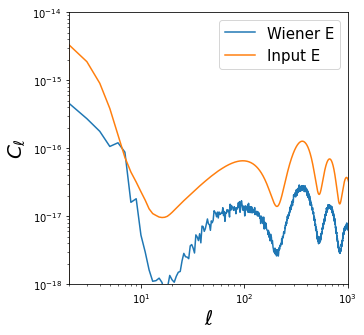

In [8]:
#fc_s4.filtEmode(0)
fc_s4.plot_W_E(0)

# LiteBIRD and CMB-S4 E-mode coadding and filtering

In [9]:
fc_lbxs4 = FiltCoadd(dire,lblib=lblib,s4lib=s4lib,coadd=True)

INFO:LiteBIRD simulation library is loaded
INFO:CMB-S4 simulation library is loaded
INFO:Coaddition is enabled


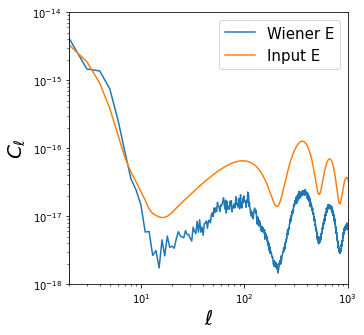

In [10]:
#fc_lbxs4.filtEmode(0,status='stat.txt')
fc_lbxs4.plot_W_E(0)